In [39]:
import ROOT
from array import array
#file = ROOT.TFile("../../projects/ana_v0/volatile/data/piplus_pi0/Fall2018_RGA_inbending_merged_cuts.root")

In [40]:
def setLogBins(hist):
    # Get the number of bins in x and Q^2 directions
    nBinsX = hist.GetNbinsX()
    nBinsY = hist.GetNbinsY()

    # Define new arrays for the bin edges in x and Q^2
    xEdges = array('d', [0.0] * (nBinsX + 1))
    yEdges = array('d', [0.0] * (nBinsY + 1))

    # Calculate logarithmic bin edges in x direction
    xMin = hist.GetXaxis().GetXmin()
    xMax = hist.GetXaxis().GetXmax()
    xLogMin = ROOT.TMath.Log10(xMin)
    xLogMax = ROOT.TMath.Log10(xMax)
    dx = (xLogMax - xLogMin) / nBinsX
    for i in range(nBinsX + 1):
        xEdges[i] = ROOT.TMath.Power(10, xLogMin + i * dx)

    # Calculate logarithmic bin edges in Q^2 direction
    yMin = hist.GetYaxis().GetXmin()
    yMax = hist.GetYaxis().GetXmax()
    yLogMin = ROOT.TMath.Log10(yMin)
    yLogMax = ROOT.TMath.Log10(yMax)
    dy = (yLogMax - yLogMin) / nBinsY
    for i in range(nBinsY + 1):
        yEdges[i] = ROOT.TMath.Power(10, yLogMin + i * dy)

    # Create a new histogram with logarithmic binning
    histLog = ROOT.TH2F(hist.GetName() + "_log", hist.GetTitle() + " (Log Bins)", nBinsX, xEdges, nBinsY, yEdges)

    # Fill the new histogram with the content from the original histogram
    for i in range(nBinsX):
        for j in range(nBinsY):
            content = hist.GetBinContent(i + 1, j + 1)
            histLog.SetBinContent(i + 1, j + 1, content)

    # Return the histogram with logarithmic binning
    return histLog

def style_hist(hist):
    ROOT.gPad.SetLeftMargin(0.17)
    ROOT.gPad.SetRightMargin(0.17)
    ROOT.gPad.SetTopMargin(0.05)
    ROOT.gPad.SetBottomMargin(0.12)
    ROOT.gPad.SetTicks(1,1)
    if type(hist) == ROOT.TH2F:
        ROOT.gPad.SetGridx(1)
        ROOT.gPad.SetGridy(1)
    hist.GetXaxis().SetTitleSize(0.07)
    hist.GetYaxis().SetTitleSize(0.07)
    hist.GetXaxis().SetLabelSize(0.05)
    hist.GetYaxis().SetLabelSize(0.05)
    hist.GetZaxis().SetLabelSize(0.05)
    hist.GetXaxis().SetTitleOffset(0.75)
    hist.GetYaxis().SetTitleOffset(1.2)
    hist.SetLineColor(1)
    hist.SetLineWidth(3)
    return hist

In [45]:
pi="-"
if pi == "-":
    file = ROOT.TFile("../../projects/pipi0_paper_RGA_only/volatile/data/piminus_pi0/Fall2018_RGA_outbending_merged_cuts.root")
else:
    file = ROOT.TFile("../../projects/pipi0_paper_RGA_only/volatile/data/piplus_pi0/Fall2018Spring2019_RGA_inbending_merged_cuts.root")
tree = file.Get("dihadron_cuts")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: hist_xQ2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist_z (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist_Mh (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist_Mgg (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist_Mgg (Potential memory leak).
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Warning in <TFile::Append>: Replacing existing TH1: hist_Mh2 (Potential memory leak).


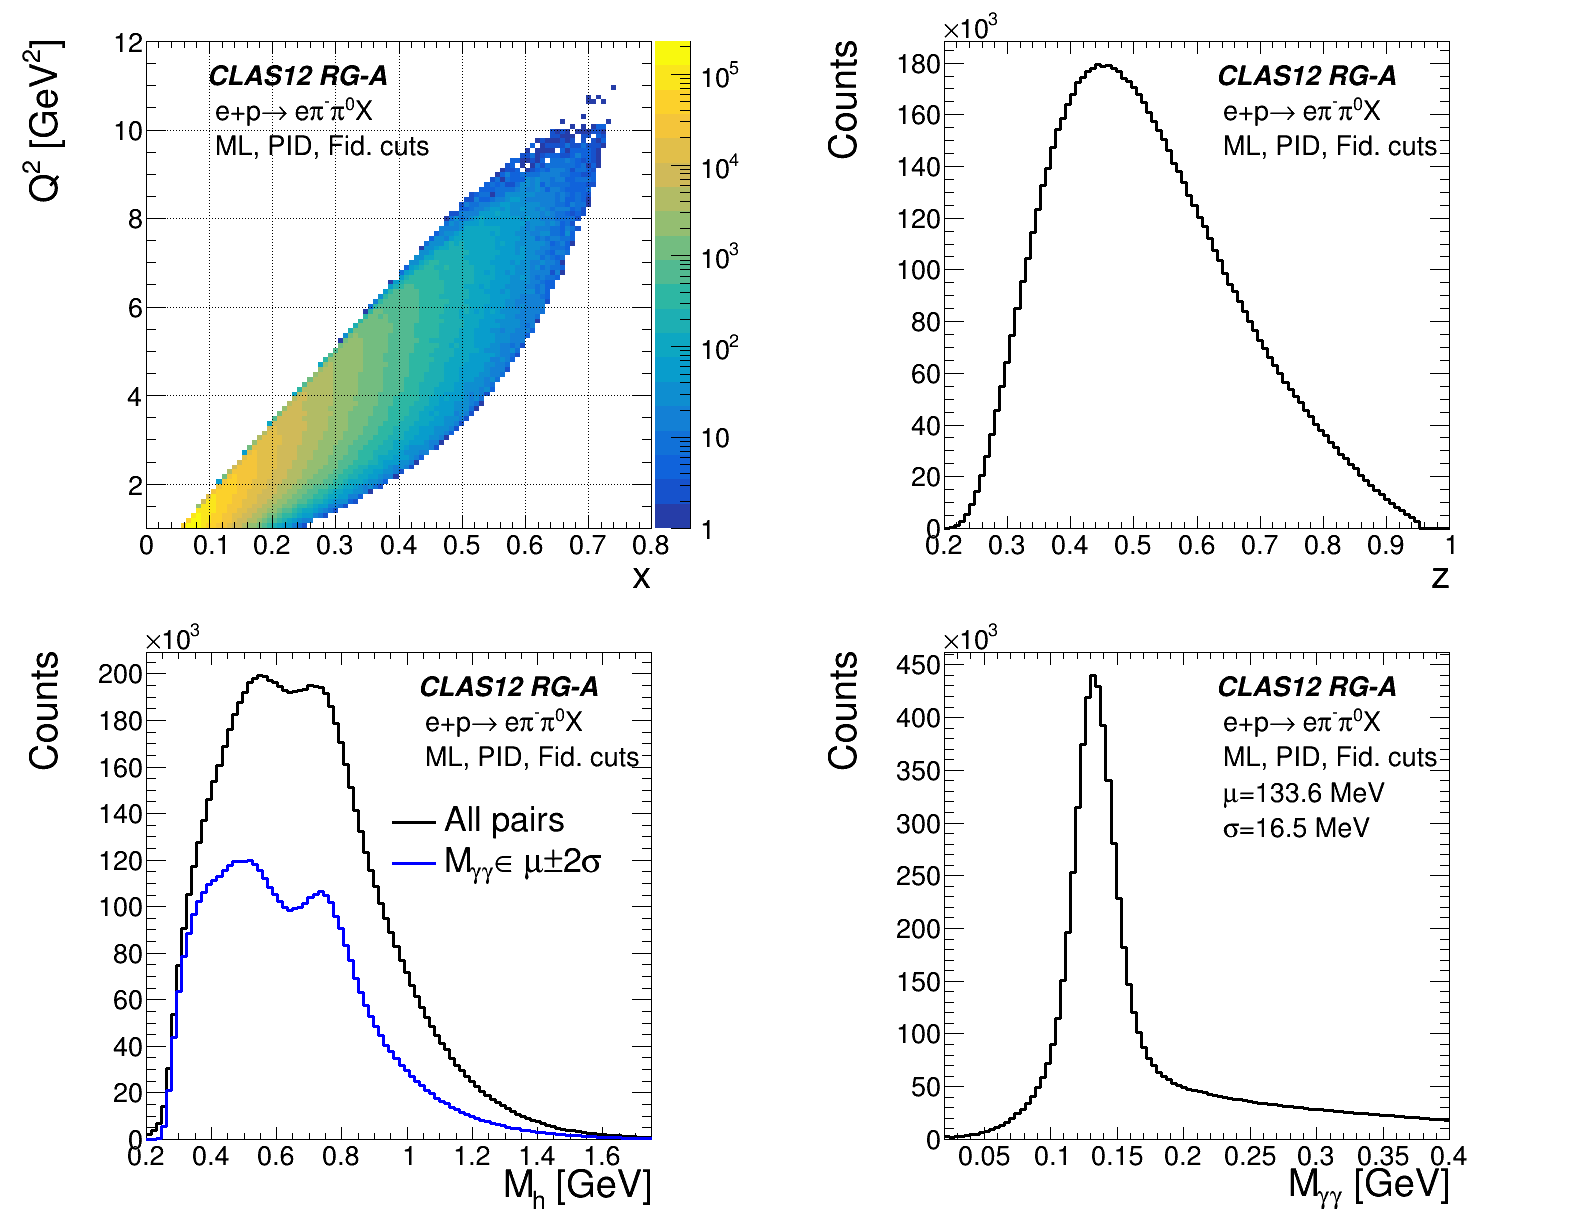

In [50]:
## Create a large square TCanvas
canvas = ROOT.TCanvas("canvas", "Large Square TCanvas", 0, 0, 1600, 1250)
ROOT.gStyle.SetOptStat(0)

canvas.Divide(2,2)

canvas.cd(1)
hist_xQ2 = ROOT.TH2F("hist_xQ2",";x;Q^{2} [GeV^{2}]",100,0,0.8,100,1,12)
hist_xQ2 = style_hist(hist_xQ2)
#hist_xQ2_log = setLogBins(hist_xQ2)
tree.Draw("Q2:x>>hist_xQ2","","colz")
ROOT.gPad.SetLogz(1)

canvas.cd(2)
hist_z = ROOT.TH1F("hist_z",";z;Counts",100,0.2,1)
hist_z = style_hist(hist_z)
tree.Draw("z>>hist_z","","hist")

canvas.cd(3)
hist_Mh = ROOT.TH1F("hist_Mh",";M_{h} [GeV];Counts",100,0.2,1.75)
hist_Mh = style_hist(hist_Mh)
tree.Draw("Mh>>hist_Mh","","hist")

canvas.cd(4)
hist_Mgg = ROOT.TH1F("hist_Mgg",";M_{#gamma#gamma} [GeV];Counts",100,0.02,0.4)
hist_Mgg = style_hist(hist_Mgg)
tree.Draw("M2>>hist_Mgg","","hist")

latex=ROOT.TLatex()
latex.SetTextSize(0.05)
latex.SetTextFont(42)
for i in range(1,5):
    canvas.cd(i)
    x,y= (0.525,0.875) if i != 1 else (0.25,0.875)
    dy = 0.06
    
    latex.DrawLatexNDC(x,y,"#bf{#it{CLAS12 RG-A}}")
    latex.DrawLatexNDC(x+0.01,y-dy,f"e+p#rightarrow e#pi^{{{pi}}}#pi^{{0}}X")
    latex.DrawLatexNDC(x+0.01,y-2*dy,"ML, PID, Fid. cuts")
    
    if i == 3:
        fit = ROOT.TF1("fit","gaus(0)+pol2(3)",0.07,0.4)
        fit.SetParLimits(1,0.12,0.14)
        fit.SetParLimits(2,0.01,0.2)
        hist_Mgg_clone=hist_Mgg.Clone()
        hist_Mgg_clone.Scale(1/hist_Mgg_clone.Integral())
        hist_Mgg_clone.Fit(fit,"NQR0")
        mu,sigma = fit.GetParameter(1), fit.GetParameter(2)
        mu_err,sigma_err = fit.GetParError(1), fit.GetParError(2)
        hist_Mh2 = ROOT.TH1F("hist_Mh2",";M_{h} [GeV];Counts",100,0.2,1.75)
        hist_Mh2 = style_hist(hist_Mh2)
        hist_Mh2.SetLineColor(ROOT.kBlue)
        tree.Draw("Mh>>hist_Mh2",f"M2>{mu-2*sigma} && M2<{mu+2*sigma}","hist same")

        legend=ROOT.TLegend(0.48,y-3*dy-0.14,0.8,y-3*dy)
        legend.AddEntry(hist_Mh,"All pairs","l")
        legend.AddEntry(hist_Mh2,"M_{#gamma#gamma}#in #mu#pm2#sigma","l")
        legend.SetBorderSize(0)
        legend.Draw("same")
        
    if i == 4:
        latex.DrawLatexNDC(x+0.01,y-3*dy,f"#mu={1000*mu:.1f} MeV")
        latex.DrawLatexNDC(x+0.01,y-4*dy,f"#sigma={1000*sigma:.1f} MeV")
# Update the canvas and display it
canvas.Update()
canvas.Draw()